In [17]:
# RNN(Recurrent Neural Network, 순환 신경망) : time step이 길어질수록 앞쪽의 데이터가 뒤쪽으로 잘 전달되지 않아 학습 능력 떨어짐(-) 
#                                            : 다층 구조로 쌓으면 입력과 출력 사이의 연관 관계가 줄어들어 장기 의존성(Long-Term Dependency) 문제(-)

# > 양방향(Bi) LSTM(Long Short Term Memory) : RNN 변형 및 보완 (셀 상탯값 추가) 
#                                           : 개체명 인식(named entity recognition)
#                                           : 시퀀스|시계열 데이터(ex. 주가)의 패턴 인식, 예측

#                                           : Input(입력) Gate (기억할 정보 양 결정)
#                                           -> Forget(삭제) Gate (이전 시점의 셀 상탯값 삭제)
#                                           -> Output(출력) Gate

# To Do! sin 곡선 예측
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

def split_sequence(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break

    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)
  
  return np.array(x), np.array(y)

# 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
print(x[:5])

[-10.0, -9.9, -9.8, -9.700000000000001, -9.600000000000001]


In [18]:
train_y = [np.sin(i) for i in x]
print(train_y[:5])

[0.5440211108893698, 0.45753589377532133, 0.3664791292519284, 0.2717606264109442, 0.1743267812229814]


In [19]:
# 하이퍼파라미터
n_timesteps = 15 # 입력 시퀀스 길이 = RNN 메모리 셀 개수
n_features = 1   # 입력 벡터의 차원 크기

train_x, train_y = split_sequence(train_y, step=n_timesteps) 
print('shape x:{} / y:{}'.format(train_x.shape, train_y.shape)) 

shape x:(185, 15) / y:(185,)


In [20]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features) # (batch size, time step, input length) -> 3차원 형태로 변환
print('train_x.shape = {}'.format(train_x.shape))
print('train_y.shape = {}'.format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [28]:
model = Sequential()

# RNN
# model.add(SimpleRNN(units=10, # RNN 계층에 존재하는 전체 뉴런 수 
#                     return_sequences=False, # 마지막 메모리 셀에서만 결과 출력 (<-> True : 모든 RNN 계산 과정에서 결과 출력)
#                     input_shape=(n_timesteps, n_features)))

# LSTM                   
model.add(LSTM(units=10, 
               return_sequences=False, 
               input_shape=(n_timesteps, n_features)))


model.add(Dense(1))
model.compile(optimizer='adam', 
              loss='mse') # 손실함수 => 모델의 출력값 - 실제값 = 오차 계산

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='loss',
    patience=5, # 성능이 증가하지 않을 때 5에포크 더 학습
    mode='auto')

history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping], verbose=0)

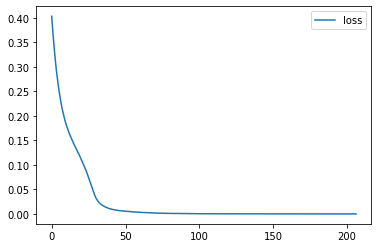

In [22]:
# 학습 에포크 증가에 따른 손실 그래프
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.show()

In [23]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
print(test_x)

[10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3
 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7
 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5
 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9
 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 19.9]


In [24]:
calc_y = np.cos(test_x) # 테스트 정답 데이터
print(calc_y)

[-0.83907153 -0.78056818 -0.71426565 -0.64082642 -0.56098426 -0.47553693
 -0.38533819 -0.29128928 -0.19432991 -0.09542885  0.0044257   0.10423603
  0.20300486  0.29974534  0.39349087  0.48330476  0.56828963  0.64759634
  0.72043248  0.7860703   0.84385396  0.89320611  0.93363364  0.96473262
  0.9861923   0.99779828  0.99943459  0.99108487  0.97283257  0.94486004
  0.90744678  0.86096662  0.80588396  0.74274917  0.67219308  0.59492066
  0.51170399  0.42337454  0.33081488  0.23494982  0.13673722  0.03715838
 -0.06279172 -0.16211444 -0.25981736 -0.35492427 -0.44648489 -0.53358439
 -0.61535248 -0.69097218 -0.75968791 -0.82081309 -0.87373698 -0.91793078
 -0.95295292 -0.97845346 -0.99417763 -0.99996829 -0.99576761 -0.98161754
 -0.95765948 -0.9241328  -0.88137249 -0.8298058  -0.76994796 -0.70239706
 -0.62782804 -0.54698596 -0.46067859 -0.36976826 -0.27516334 -0.17780907
 -0.07867819  0.02123881  0.1209436   0.21943996  0.31574375  0.40889274
  0.4979562   0.58204425  0.66031671  0.7319915   0

In [25]:
test_y = calc_y[:n_timesteps]
print(test_y)

[-0.83907153 -0.78056818 -0.71426565 -0.64082642 -0.56098426 -0.47553693
 -0.38533819 -0.29128928 -0.19432991 -0.09542885  0.0044257   0.10423603
  0.20300486  0.29974534  0.39349087]


In [26]:
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i : i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))
  predict_y = model.predict(net_input)
  test_y = np.append(test_y, predict_y)

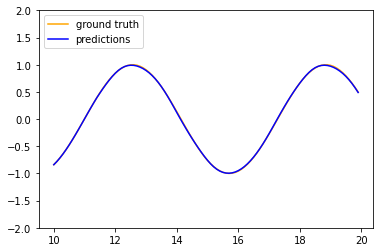

In [27]:
# 예측 결과 그래프
plt.plot(test_x, calc_y, label='ground truth', color='orange')
plt.plot(test_x, test_y, label='predictions', color='blue')

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()